### Latar Belakang

1. Perusahaan layanan yang menjual produk mereka kepada user terutama di bidang telekomunikasi terus berkembang dari masa ke masa. Begitupun dengan kondisi market yang ada, alih-alih merambah market baru, kondisi saat ini membuat antar perusahaan bersaing terhadap market share yang ada.<br>

2. Kondisi persaingan bisnis yang kompetitif menambah market atau menambah customer baru jauh lebih mahal ketimbang mempertahankan customer yang sudah ada.<br>

3. Analisis churn akan membantu kita agar bisa menganalisis customer mana yang punya kecenderungan akan berhenti menggunakan produk kita, sehingga dengan mengetahui perilaku customer yang memiliki kecenderungan akan berhenti terhadap layanan, kita dapat melakukan langkah preventif agar customer tetap bertahan dengan cara memberikan discount maupun program lainnya.

### Tantangan

1. Dari data yang tersedia, **bagaimana pola** yang muncul sehingga customer memilih berhenti menggunakan produk kita(churn)?
2. Dari data yang tersedia, **apa** yang membuat customer sehingga memutuskan untuk berhenti menggunakan produk kita(churn)?
3. Bagaimana membuat model prediksi yang akan menguntungkan perusahaan? dengan pertimbangan:
    - Apabila kita tepat memberikan program diskon kepada customer yang akan churn, maka kita telah **menghemat biaya.**
    - Apabila kita memberikan program diskon kepada customer yang sebenarnya tidak akan churn, maka kita akan menghamburkan biaya.
4. Sebenarnya kita tidak dapat mengcover banyaknya variasi alasan kenapa customer berhenti menggunakan produk kita(churn). Namun dengan dilakukan analisis deskripsi, diagnosis, dan prediktif ini akan membantu perusahaan sehingga memiliki **pendekatan yang terukur dalam mempertahankan customer.**

### Tujuan

#### Memberikan rekomendasi kepada perusahaan berdasarkan hasil analisis agar membuat program untuk mencegah customer *churn*

### Uji kasus
Terdapat 10 soal yang tersusun pada notebook:<br>
[01-ask-question](01-ask-question.ipynb)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

### Load Dataset | Sumber data: df_raw_prepared.csv

In [2]:
df_raw = pd.read_csv("df_raw_prepared.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# duplicate df_raw
df_procc = df_raw.copy()

### Untuk soal uji tes nomor 1-6:
### 1. Distribusi label Churn

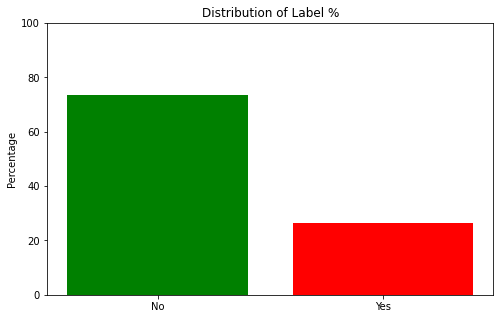

In [4]:
fig, axes1 = plt.subplots(figsize=(8,5))

# Plot distribution of gender data
data = df_procc["Churn"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green', 'red'])
axes1.set_title('Distribution of Label %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)
plt.show()

#### Reveal:
> Jumlah kelas Churn (Yes) lebih sedikit ketimbang jumlah kelas tidak Churn (No). Disini kita dapat simpulkan, **label dataset kita imbalance**. Kasus **imbalance adalah normal terjadi**, dimana kejadian yang tidak diharapkan terjadi cenderung lebih sedikit daripada kejadian normal terjadi. Walaupun hal ini normal terjadi di kehidupan kita, namun untuk proses analisis lebih lanjut **kita perlu memberikan perhatian khusus pada kasus ini**, kaitannya dengan distribusi data, data imbalance terjadi dikarenakan kelas-kelas yang ada tidak sama terwakilkan jumlahnya (Nitesh Chawla, et al, 2002). **Jika imbalance tidak ditangani**, kedepannya akan berdampak pada hasil analisis prediktif, dimana **model cenderung banyak memprediksi kelas yang dominan ketimbang lainnya.**

### 2. Kecenderungan Kategori Gender Terhadap Churn

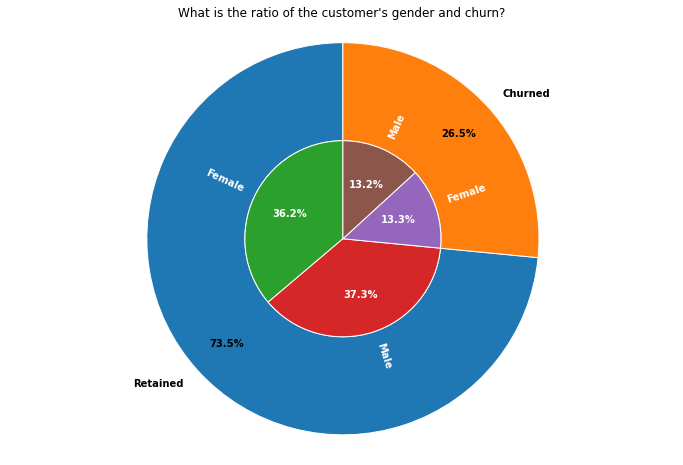

In [5]:
fig, axes2 = plt.subplots(figsize=(12,8))

# Pie chart of churn percentage
width = 0.5

# Percentage of Churned vs Retained
data = df_procc.Churn.value_counts().sort_index()
axes2.pie(
    data,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)

# Percentage of Gender based on Churn
data = df_procc.groupby(["Churn", "gender"]).size().reset_index()
axes2.pie(
    data.iloc[:,2], 
    labels=list(data.gender),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True,
)

axes2.set_title('What is the ratio of the customer\'s gender and churn?')
#axes2.legend(loc='best', bbox_to_anchor=(1,1))
axes2.axis('equal')

plt.show()

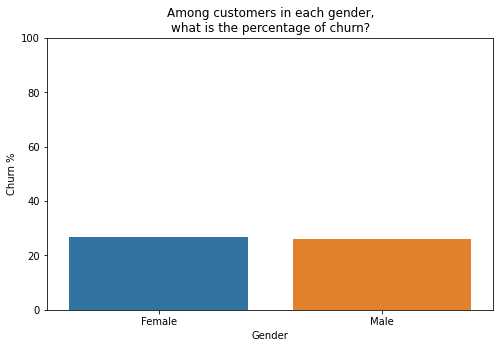

In [6]:
ig, axes3 = plt.subplots(figsize=(8,5))
list_y_val = [0 if item=="No" else 100 for item in df_procc['Churn'].tolist()]

# Chances of churn based on gender
sns.barplot(x="gender", y=list_y_val, data=df_procc, ci=None, ax=axes3)
axes3.set_xlabel('Gender')
axes3.set_ylabel('Churn %')
axes3.set_title('\n'.join(wrap('Among customers in each gender, what is the percentage of churn?', 35)))
axes3.set_ylim(0,100)
plt.show()

#### Reveal:

> Dari visualisasi yang dapat kita lihat diatas menunjukkan bahwa **perbedaan gender tidak mempengaruhi perilaku customer dalam pengambilan keputusan untuk melakukan churn**. Prosentase yang hampir sama yaitu **13,3% untuk perempuan dan 13,2% untuk laki-laki** menunjukkan tidak ada perbedaan yang berarti. Dari sini menunjukkan bahwa dataset cukup bagus dalam distribusi kategori gender, dan **tidak akan menyebabkan bias gender** karena distribusi yang cenderung sama untuk kategori Female maupun Male.

### 3. Kecenderungan Kategori Kewarganegaraan Terhadap Churn

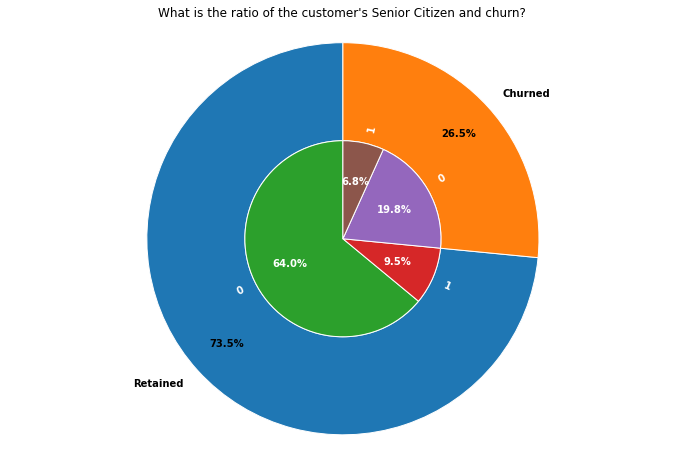

In [7]:
fig, axes2 = plt.subplots(figsize=(12,8))

# Pie chart of churn percentage
width = 0.5

# Percentage of Churned vs Retained
data = df_procc.Churn.value_counts().sort_index()
axes2.pie(
    data,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)

# Percentage of Gender based on Churn
data = df_procc.groupby(["Churn", "SeniorCitizen"]).size().reset_index()
axes2.pie(
    data.iloc[:,2], 
    labels=list(data.SeniorCitizen),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True,
)

axes2.set_title('What is the ratio of the customer\'s Senior Citizen and churn?')
#axes2.legend(loc='best', bbox_to_anchor=(1,1))
axes2.axis('equal')

plt.show()

In [8]:
df_churn = df_procc[df_procc['Churn']=="Yes"]
print(df_churn.shape)

df_churn['SeniorCitizen'].value_counts()

(1869, 21)


0    1393
1     476
Name: SeniorCitizen, dtype: int64

#### Reveal:
> Dari hasil visualisasi diatas, menunjukkan bahwa customer dengan **kategori kewarganegaraan 0 melakukan churn sebesar 18,8% dan dengan kategori 1 melakukan churn sebesar 6,8% dari keseluruhan total data**. Namun kita dapat melihat, proporsi sebaliknya yaitu kategori 0 non churn sebesar 64% dan kategori 1 non churn sebesar 9,5% dari keseluruhan total data. Hal ini menunjukkan bahwa **tidak dapat disimpulkan hanya dari status kewarganegaraan dapat menunjukkan pola seseorang akan melakukan churn**. Karena dapat kita lihat status kewarganegaraan 0 dominan di non churn dan churn, begitu juga sebaliknya dengan status 1 yang minor pada non churn dan churn. **Hal ini kemungkinan terjadi karena distribusi kategori status kewarganegaraan yang tidak merata sehingga kategori 0 selalu dominan baik di churn maupun non churn.**

### 4. Kecenderungan Kategori layanan internet Terhadap Churn

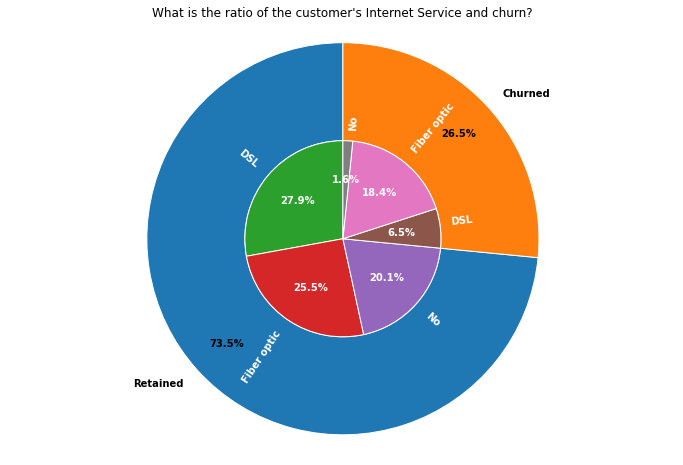

In [9]:
fig, axes2 = plt.subplots(figsize=(12,8))

# Pie chart of churn percentage
width = 0.5

# Percentage of Churned vs Retained
data = df_procc.Churn.value_counts().sort_index()
axes2.pie(
    data,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)

# Percentage of Gender based on Churn
data = df_procc.groupby(["Churn", "InternetService"]).size().reset_index()
axes2.pie(
    data.iloc[:,2], 
    labels=list(data.InternetService),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True,
)

axes2.set_title('What is the ratio of the customer\'s Internet Service and churn?')
#axes2.legend(loc='best', bbox_to_anchor=(1,1))
axes2.axis('equal')

plt.show()

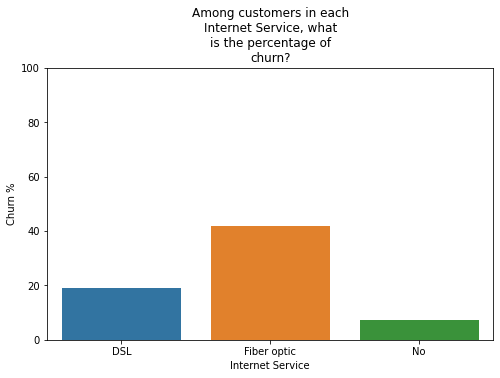

In [10]:
ig, axes3 = plt.subplots(figsize=(8,5))
list_y_val = [0 if item=="No" else 100 for item in df_procc['Churn'].tolist()]

# Chances of churn based on gender
sns.barplot(x="InternetService", y=list_y_val, data=df_procc, ci=None, ax=axes3)
axes3.set_xlabel('Internet Service')
axes3.set_ylabel('Churn %')
axes3.set_title('\n'.join(wrap('Among customers in each Internet Service, what is the percentage of churn?', 24)))
axes3.set_ylim(0,100)
plt.show()

#### Reveal:
> Dari hasil visualisasi diatas, menunjukkan bahwa customer dengan kategori layanan internet Fiber Optic melakukan churn sebesar 18,4%, pada kategori DSL sebesar 6,5%, dan dengan kategori No melakukan churn sebesar 1,6% dari keseluruhan total data. Pada proporsi non churn, persebaran kategori cukup berimbang yaitu pada rentang 20-27%. Dari sini kita dapat menyimpulkan bahwa pada kecenderungan untuk kategori layanan internet, **customer akan cenderung melakukan churn pada layanan Fiber optic.**

### 5. Kecenderungan Kategori jenis kontraknya Terhadap Churn

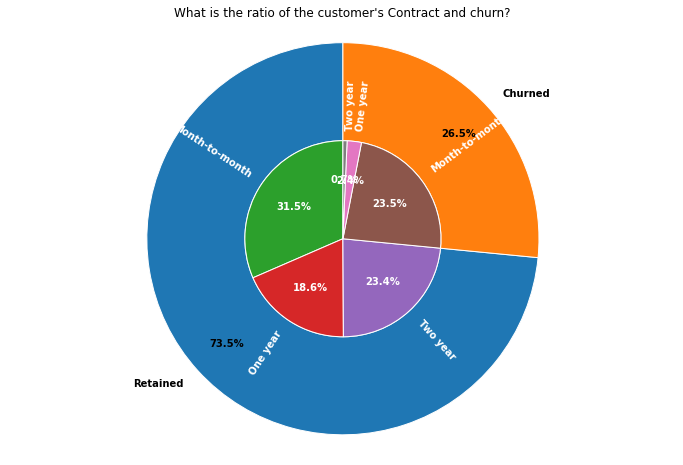

In [11]:
fig, axes2 = plt.subplots(figsize=(12,8))

# Pie chart of churn percentage
width = 0.5

# Percentage of Churned vs Retained
data = df_procc.Churn.value_counts().sort_index()
axes2.pie(
    data,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)

# Percentage of Gender based on Churn
data = df_procc.groupby(["Churn", "Contract"]).size().reset_index()
axes2.pie(
    data.iloc[:,2], 
    labels=list(data.Contract),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True,
)

axes2.set_title('What is the ratio of the customer\'s Contract and churn?')
#axes2.legend(loc='best', bbox_to_anchor=(1,1))
axes2.axis('equal')

plt.show()

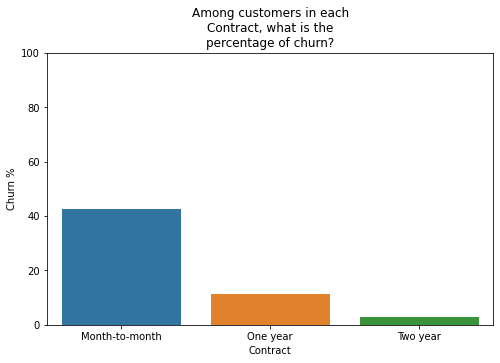

In [12]:
ig, axes3 = plt.subplots(figsize=(8,5))
list_y_val = [0 if item=="No" else 100 for item in df_procc['Churn'].tolist()]

# Chances of churn based on gender
sns.barplot(x="Contract", y=list_y_val, data=df_procc, ci=None, ax=axes3)
axes3.set_xlabel('Contract')
axes3.set_ylabel('Churn %')
axes3.set_title('\n'.join(wrap('Among customers in each Contract, what is the percentage of churn?', 24)))
axes3.set_ylim(0,100)
plt.show()

#### Reveal:
> Dari hasil visualisasi diatas, menunjukkan bahwa customer dengan kategori kontrak Month to month melakukan churn sebesar 23,5,4%, pada kategori One year dan two year dibawah 10% dari keseluruhan total data. Pada proporsi non churn, persebaran kategori cukup berimbang yaitu pada rentang 18-31%. Dari sini kita dapat menyimpulkan bahwa pada kecenderungan untuk kategori kontrak, **customer akan cenderung melakukan churn pada kategori kontrak Month to month.**

### 6. Kecenderungan biaya bulanan Terhadap Churn

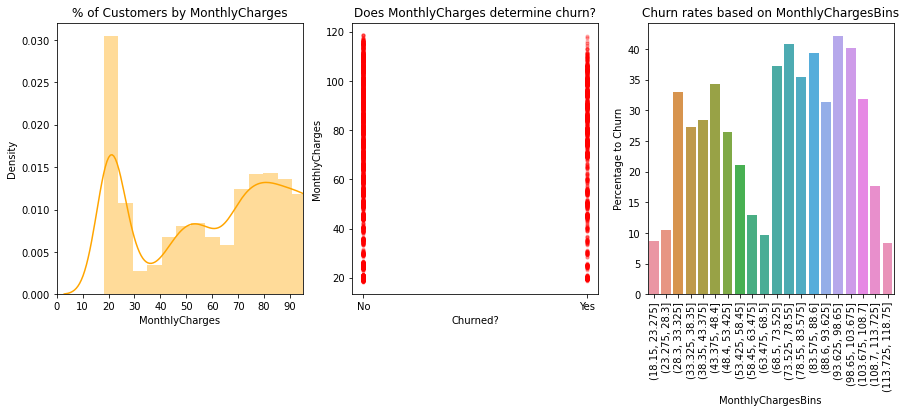

In [13]:
fig, [axes1, axes2, axes3] = plt.subplots(1,3,figsize=(15,5))

# Plot tenure
sns.distplot(df_procc.MonthlyCharges, color='orange', ax=axes1)
axes1.set_title('% of Customers by MonthlyCharges')
axes1.set_xticks(np.arange(0, 100, 10))
axes1.set_xlim(0,95)

# Plot relation between tenure and churn
axes2.scatter(df_procc.Churn, df_procc.MonthlyCharges, color='red', s=10, alpha=0.2)
axes2.set_xlabel('Churned?')
axes2.set_ylabel('MonthlyCharges')
axes2.set_title('Does MonthlyCharges determine churn?')

# Categorize Cashback Amount into bins and plot
df_procc['MonthlyChargesBins'] = pd.cut(df_procc["MonthlyCharges"], bins=20)
sns.barplot(x='MonthlyChargesBins', y=list_y_val, data=df_procc, ci=None, ax=axes3)
[items.set_rotation(90) for items in axes3.get_xticklabels()]
axes3.set_ylabel('Percentage to Churn')
axes3.set_title('Churn rates based on MonthlyChargesBins')

plt.show()

In [14]:
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094
std,0.435799,19.531123,24.666053,1890.822994
min,0.000000,1.000000,18.850000,18.850000
25%,0.000000,2.000000,56.150000,134.500000
50%,0.000000,10.000000,79.650000,703.550000
75%,1.000000,29.000000,94.200000,2331.300000
max,1.000000,72.000000,118.350000,8684.800000


In [15]:
df_no_churn = df_procc[df_procc['Churn']=="No"]
df_no_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000
mean,0.128721,37.569965,61.265124,2554.765772
std,0.334923,24.113777,31.092648,2327.012699
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,15.000000,25.100000,579.575000
50%,0.000000,38.000000,64.425000,1689.175000
75%,0.000000,61.000000,88.400000,4262.850000
max,1.000000,72.000000,118.750000,8672.450000


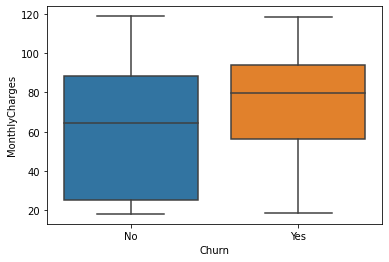

In [16]:
ax = sns.boxplot(x="Churn", y="MonthlyCharges", data=df_procc)

#### Reveal:
> Dari hasil visualisasi menggunakan histogram dan barplot tidak terlalu menunjukkan kecenderungan yang signifikan bahwa perbedaan biaya bulanan akan mempengaruhi churn. Namun setelah melihat persebaran data menggunakan boxplot, sedikit terlihat bahwa **customer yang churn cenderung memiliki biaya bulanan yang lebih tinggi.**

### Misc

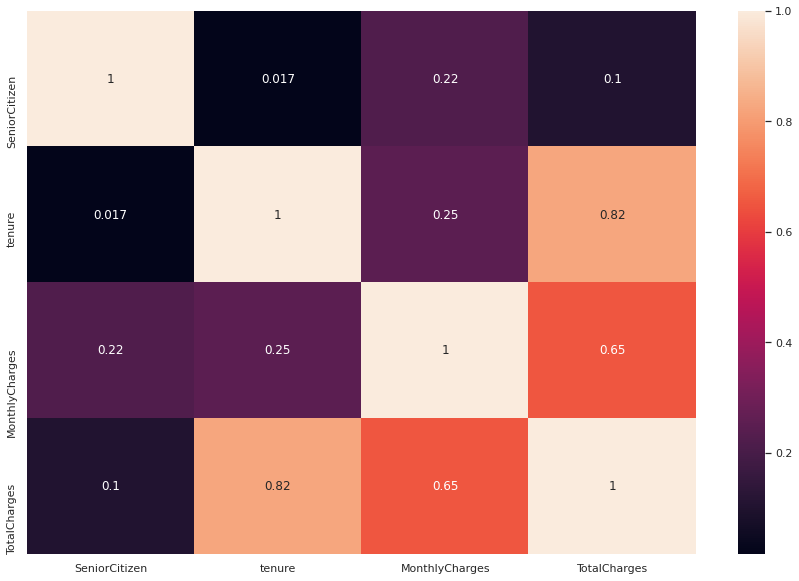

In [17]:
# melihat korelasi antar numerik variabel
sns.set(rc={'figure.figsize':(15,10)})
corr = df_procc.corr()
sns.heatmap(corr,annot=True)
plt.show()

#### Reveal:
> Tenure, MonthlyCharges, dan TotalCharges berkorelasi positif kuat. Apabila nantinya menggunakan model linear, kita dapat menghapus fitur dan memilih salah satunya saja.

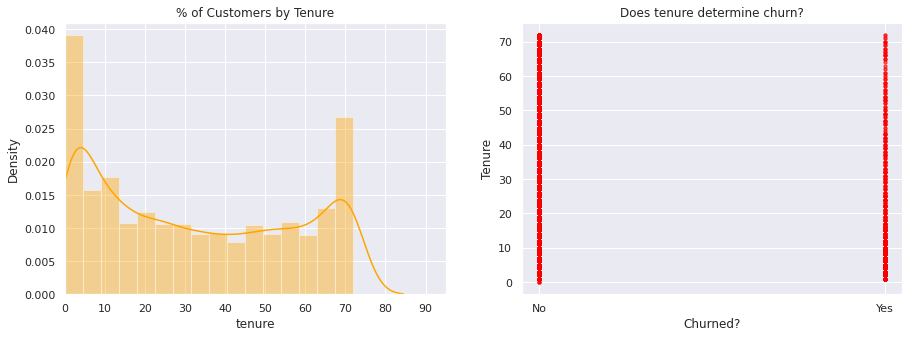

In [19]:
# Bagaimana Tenure terhadap Churn

fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,5))

# Plot tenure
sns.distplot(df_procc.tenure, color='orange', ax=axes1)
axes1.set_title('% of Customers by Tenure')
axes1.set_xticks(np.arange(0, 100, 10))
axes1.set_xlim(0,95)

# Plot relation between tenure and churn
axes2.scatter(df_procc.Churn, df_procc.tenure, color='red', s=10, alpha=0.2)
axes2.set_xlabel('Churned?')
axes2.set_ylabel('Tenure')
axes2.set_title('Does tenure determine churn?')

plt.show()

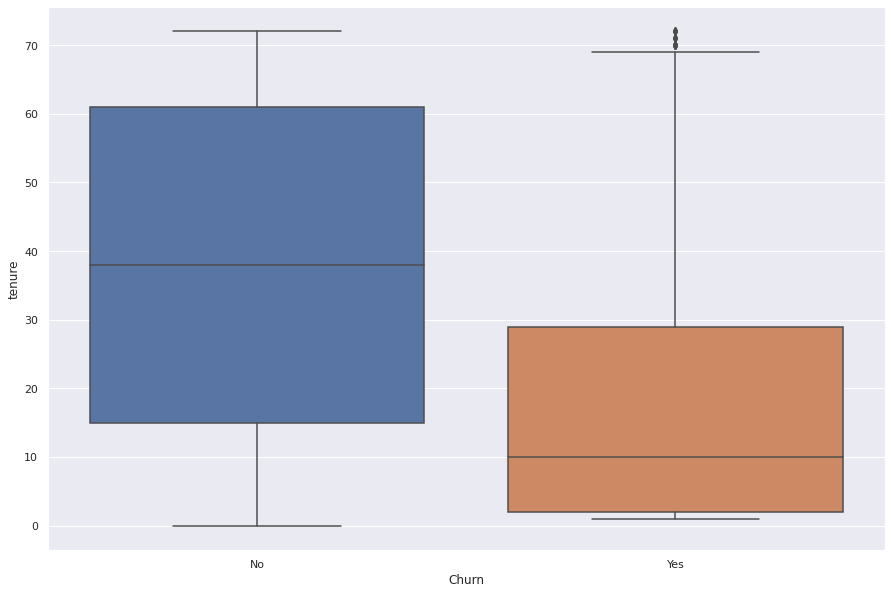

In [22]:
ax = sns.boxplot(x="Churn", y="tenure", data=df_procc)

#### Reveal:
> Jumlah tenure yang cenderung menunjukkan pola customer akan melakukan churn adalah yang memiliki nilai cenderung rendah.

#### You can jump to the:
- [05-modelling](05-modelling.ipynb)
for question number 6-10